In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt


In [ ]:
env = gym.make('Taxi-v3')


/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# hyper parameters
gamma = 0.9
alpha = 0.1
num_episode = 2000
epsilon = 0.1
min_alpha = 0.05
max_alpha = 0.9
decay_rate = 0.005
max_epsilon = 1.0       
min_epsilon = 0.01

In [ ]:
def eps_greedy(state, Q, eps):
  
  epsilon = eps
  if np.random.uniform() < epsilon:
    action = env.action_space.sample() 
  else:
    action = np.argmax(Q[state])
  return action


## Q_learning

In [ ]:
def Q_learning(env, gamma, alpha, num_episode, epsilon, lr_decay_flag):

  total_reward_per_run = []
  
  for r in range(20):
    
  
    q = np.zeros([env.observation_space.n, env.action_space.n])

    total_reward = []
    
    for e in range(num_episode):

      # Reduce epsilon
      epsilon = min_alpha + (max_alpha - min_alpha)*np.exp(-decay_rate*e)
      #print("epsilon :", epsilon)
      #epsilon = epsilon- eps_decay
      #epsilon = epsilon /(e + 100) 
      
      
      # reduce learning_rate

      if lr_decay_flag:

        alpha = min_alpha + (max_alpha - min_alpha)*np.exp(-decay_rate*e)
        #alpha = alpha/(e+100) 
        #print("alpha :", alpha)
      

      state = env.reset(seed = 296)
      eps_reward = []
      done = False

      while not done:

        action = eps_greedy(state, q, epsilon)

        next_state, reward, done, info = env.step(action)

        q[state, action] += (alpha * (reward + (gamma * np.max(q[next_state])  - q[state, action] )))
        state = next_state
        eps_reward.append(reward)

      
      total_reward.append(sum(eps_reward))
    
    total_reward_per_run.append(total_reward)
    

  print("Training finished.\n")
  return q, np.mean(total_reward_per_run, axis = 0)


In [ ]:
q_policy, q_mean_reward = Q_learning(env, gamma, alpha, num_episode, epsilon, lr_decay_flag = False)

In [ ]:
q_policy_with_decay, q_mean_reward_with_decay = Q_learning(env, gamma, alpha, num_episode, epsilon, lr_decay_flag = True)

Training finished.



In [ ]:
def plott(a,b,title): 

    plt.figure(figsize=(20,8))
    plt.plot(a, color='r', label='costant_lr')
    plt.plot(b, color='b', label='decay_lr')
    plt.xlabel("Episodes")
    plt.ylabel("mean_reward")
    plt.title(title)
    plt.legend()
    plt.show()

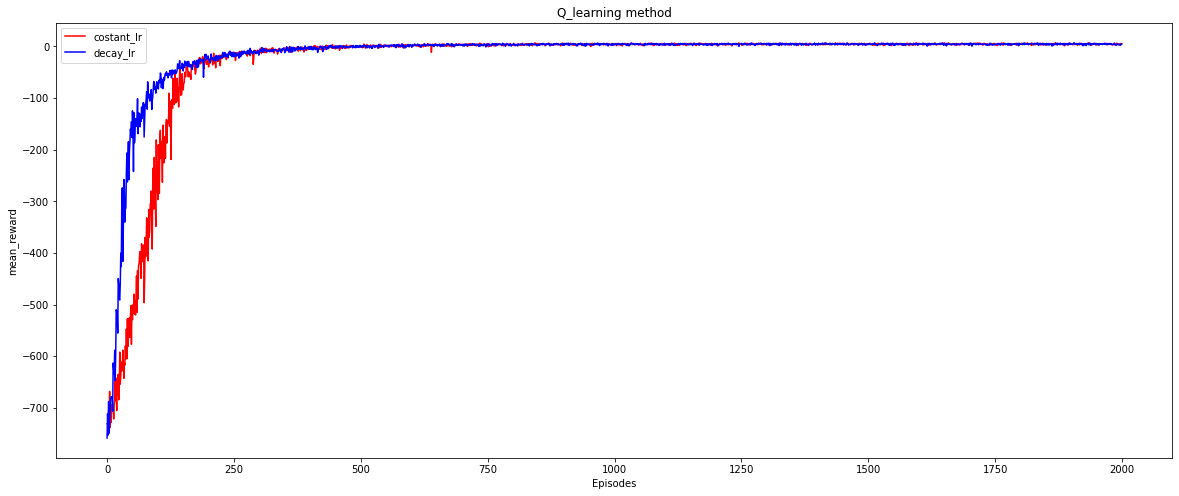

In [ ]:
plott(q_mean_reward, q_mean_reward_with_decay, "Q_learning method")

# SARSA

In [ ]:
def SARSA(env, gamma, alpha, num_episode, epsilon):

  total_reward_per_run = []
  

  for r in range(20):


    q = np.zeros([env.observation_space.n, env.action_space.n])

    total_reward = []
    

    for e in range(num_episode):

      # Reduce epsilon

      epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*e)
      
      state = env.reset(seed = 296)
      eps_reward = []
      done = False

    
      while not done :
        
        action = eps_greedy(state, q, epsilon)
        
        next_state, reward, done, info = env.step(action)

        next_action = eps_greedy(next_state, q, epsilon) 

        q[state, action] += (alpha * (reward + (gamma * q[next_state, next_action]  - q[state, action] )))
        state = next_state
        eps_reward.append(reward)


      total_reward.append(sum(eps_reward))
    
    total_reward_per_run.append(total_reward)

  print("Training finished.\n")
  return q, np.mean(total_reward_per_run, axis = 0)



In [ ]:
s_policy, s_mean_reward = SARSA(env, gamma, alpha, num_episode, epsilon)

Training finished.



# n_step sarsa

In [ ]:
def n_step_SARSA(env, gamma, alpha, num_episode, n_step, epsilon):
  total_reward_per_run = []
  

  for r in range(20):


    q = np.zeros([env.observation_space.n, env.action_space.n])
    total_reward = []
    for e in range(num_episode):
      

      epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*e)

    
      state = env.reset(seed = 296)
      action = eps_greedy(state, q, epsilon)

      t = 0
      T = np.inf

      actions = [action]
      states = [state]
      rewards = []

      while True :

        if t < T :
          next_state, reward, done, info = env.step(action)
          states.append(next_state)
          rewards.append(reward)

          if done:
            T = t + 1
          else:
            action = eps_greedy(state, q, epsilon)
            actions.append(action)

        tau = t - n_step + 1 
        if tau >= 0:
          G = 0
          
          for i in range(tau + 1, min(tau + n_step, T)):
            
            G += np.power(gamma, i - tau - 1) * rewards[i]
          if tau + n_step < T:
            state_action = (states[tau + n_step], actions[tau + n_step])
            G += np.power(gamma, n_step) * q[state_action[0],state_action[1]]
          # update Q values
          state_action = (states[tau], actions[tau])
          
          q[state_action[0],state_action[1]] += alpha * (G - q[state_action[0],state_action[1]])

        if tau == T-1:
          break

        t+=1
       

      total_reward.append(sum(rewards))
      
      
    total_reward_per_run.append(total_reward)
    

  print("Training finished.\n")
  return q, np.mean(total_reward_per_run, axis = 0)


In [ ]:
n_step = 2
ns_policy_with_decay_2, ns_mean_reward_with_decay_2 = n_step_SARSA(env, gamma, alpha, num_episode, n_step, epsilon)

Training finished.



In [ ]:
n_step = 3
ns_policy_with_decay_3, ns_mean_reward_with_decay_3 = n_step_SARSA(env, gamma, alpha, num_episode , n_step, epsilon)

Training finished.



In [ ]:
n_step = 4
ns_policy_with_decay_4, ns_mean_reward_with_decay_4 = n_step_SARSA(env, gamma, alpha, num_episode, n_step, epsilon)

Training finished.



In [ ]:
def plott(a,b,c,d,title): 

    plt.figure(figsize=(20,8))
    plt.plot(a, color='y', label='sarsa')
    plt.plot(b, color='r', label='2_step')
    plt.plot(c, color='b', label='3_step')
    plt.plot(d, color='g', label='4_step')
    plt.xlabel("Episodes")
    plt.ylabel("mean_reward")
    plt.title(title)
    plt.legend()
    plt.show()

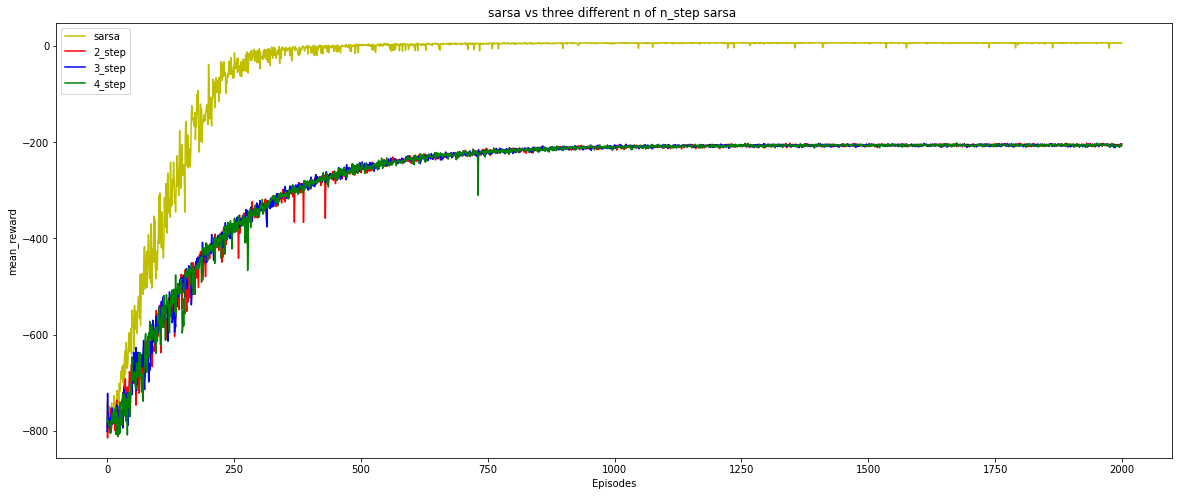

In [ ]:
plott(s_mean_reward,ns_mean_reward_with_decay_2,ns_mean_reward_with_decay_3,ns_mean_reward_with_decay_4,"sarsa vs three different n of n_step sarsa ")

# on-policy monte carlo 

In [ ]:
def generate_episode(env, policy):
   
  episode = []
  
  state = env.reset()
  num_action = 0
  
  while True :


    action = np.random.choice(env.action_space.n, p=policy[state])
    next_state, reward, done, info = env.step(action)
     
   
    episode.append((state, action, reward))
    
    state = next_state
    num_action += 1

    if num_action == 1000 :
      break  

  return episode


In [ ]:
def on_PolicyMC(env, gamma, num_episode, epsilon, eps_decay_flag):

  
  total_return = np.zeros([env.observation_space.n, env.action_space.n])
  total_reward_per_run = []

  for r in range(20):

    q = np.zeros([env.observation_space.n, env.action_space.n])
    count_state_action =  np.zeros([env.observation_space.n, env.action_space.n])
    


    policy = np.ones((env.observation_space.n, env.action_space.n)) /env.action_space.n
    total_reward_per_episode = []


    for e in range(num_episode):

      if eps_decay_flag:
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*e)
      
     
      #so, here we pass our initialized Q function to generate an episode
      episode = generate_episode (env, policy)
      
      G = 0

  
      #get all the state-action pairs in the episode
      all_state_action_pairs = [(s, a) for (s,a,r) in episode]
      

      #store all the rewards obtained in the episode in the rewards list
      rewards = [r for (s,a,r) in episode]
      total_reward_per_episode.append(sum(rewards))
      

      #for each step in the episode 
      for t, (state, action, reward) in enumerate(reversed(episode)):
        
        t_prim = len(episode) - t -1
        
        #if the state-action pair is occurring for the first time in the episode
        if not (state, action) in all_state_action_pairs[0:t_prim]:
          
          
          total_return[state,action] = total_return[state,action] + G
          
          #update the number of times the state-action pair is visited
          count_state_action[state, action] += 1
          
          #compute the Q value by just taking the average
          q[state,action] = total_return[state, action] / count_state_action[state, action]
        

          for a in range(env.action_space.n):
            if a == np.argmax(q[state,:]):
              policy[state][a] = 1 - epsilon + epsilon / env.action_space.n
            else:
              policy[state][a] = epsilon / env.action_space.n

      total_reward_per_run.append(total_reward_per_episode)         
            
    return q , np.mean(total_reward_per_run, axis = 0)
            




In [ ]:
mc_policy, mc_mean_reward = on_PolicyMC(env, gamma, num_episode, epsilon, eps_decay_flag = False)

In [ ]:
mc_policy_with_decay, mc_mean_reward_with_decay = on_PolicyMC(env, gamma, num_episode, epsilon, eps_decay_flag = True)

In [ ]:
def plott(a,b,title): 

    plt.figure(figsize=(20,8))
    plt.plot(a, color='r', label='costant_epsilon')
    plt.plot(b, color='b', label='decay_epsilon')
    plt.xlabel("Episodes")
    plt.ylabel("mean_reward")
    plt.title(title)
    plt.legend()
    plt.show()

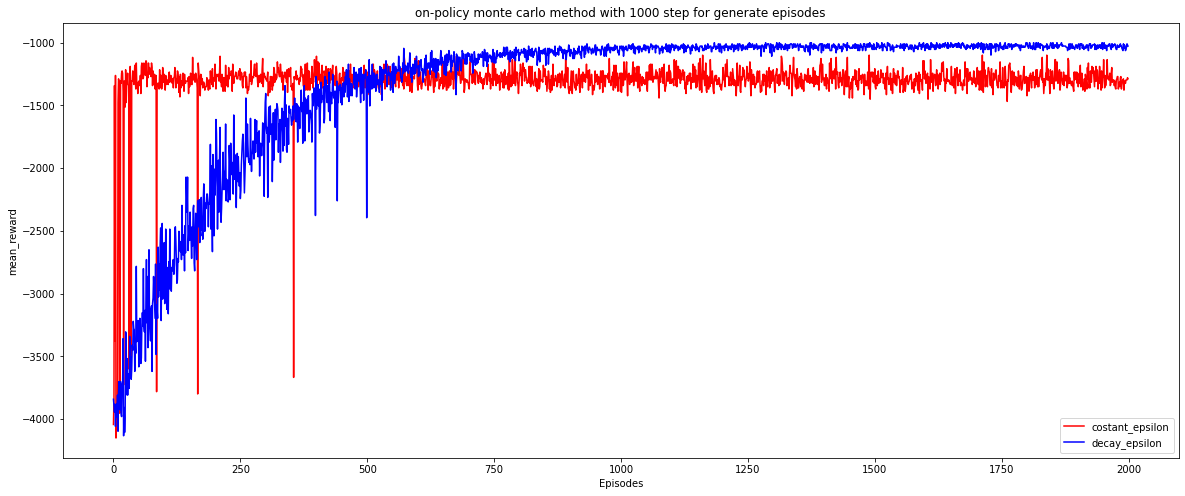

In [ ]:
plott(mc_mean_reward,mc_mean_reward_with_decay,"on-policy monte carlo method with 1000 step for generate episodes")